In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# File path
file_path = r"C:\Users\Lenovo\Downloads\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv"

# Load dataset
df = pd.read_csv(file_path, delimiter=',', skiprows=4, on_bad_lines='skip')

# Drop unnecessary columns
df = df.drop(columns=["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 68"], errors='ignore')

# Convert years to numeric format
df_long = pd.melt(df, id_vars=["Country Name"], var_name="Year", value_name="Birth Rate")
df_long["Year"] = pd.to_numeric(df_long["Year"])
df_long["Birth Rate"] = pd.to_numeric(df_long["Birth Rate"], errors='coerce')

# Drop NaN values
df_long.dropna(subset=["Birth Rate"], inplace=True)

# Select a specific country (e.g., "United States")
country = "India"
df_country = df_long[df_long["Country Name"] == country].set_index("Year")
df_country = df_country.drop(columns=["Country Name"])


In [9]:
def adf_test(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    
    if result[1] < 0.05:
        print("Conclusion: The series is stationary (reject H0).")
    else:
        print("Conclusion: The series is NOT stationary (fail to reject H0).")

# Run ADF Test
adf_test(df_country["Birth Rate"])


Augmented Dickey-Fuller Test:
ADF Statistic: 0.4093494063501099
p-value: 0.9818412284434737
Critical Values: {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}
Conclusion: The series is NOT stationary (fail to reject H0).


Augmented Dickey-Fuller Test:
ADF Statistic: -4.457931493157466
p-value: 0.0002340774116945356
Critical Values: {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
Conclusion: The series is stationary (reject H0).


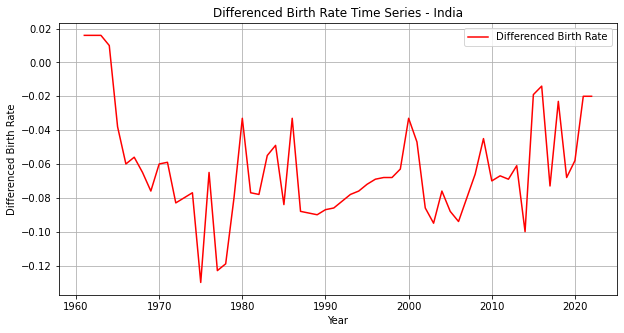

In [10]:
df_country["Diff"] = df_country["Birth Rate"].diff().dropna()

# Re-run ADF Test
adf_test(df_country["Diff"].dropna())

# Plot Differenced Data
plt.figure(figsize=(10,5))
plt.plot(df_country["Diff"], label="Differenced Birth Rate", color="red")
plt.title(f"Differenced Birth Rate Time Series - {country}")
plt.xlabel("Year")
plt.ylabel("Differenced Birth Rate")
plt.legend()
plt.grid()
plt.show()